In [1]:
import pandas as pd
import numpy as np 
#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
#Similarity
from sklearn.neighbors import NearestNeighbors
import sklearn.metrics as metrics
import subprocess


In [2]:
Books=pd.read_csv(r'C:\Users\CBE\Desktop\data\BX-Books.csv', sep=';', encoding='Latin_1')
Rating=pd.read_csv(r'C:\Users\CBE\Desktop\data2\Books_Ratings.csv', sep=';', encoding='Latin_1')
Users=pd.read_csv(r'C:\Users\CBE\Desktop\data2\Books_users.csv', sep=';', encoding='Latin_1')


C:\Users\CBE\AppData\Local\Temp\ipykernel_37232\1875668041.py:1: DtypeWarning: Columns (3,8,9,10) have mixed types. Specify dtype option on import or set low_memory=False.
  Books=pd.read_csv(r'C:\Users\CBE\Desktop\data\BX-Books.csv', sep=';', encoding='Latin_1')


# Exploratory Data Analysis (EDA)

### Books

In [3]:
books=Books.copy()

In [4]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,NaN
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN,NaN
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN,NaN
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN,NaN
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN,NaN


In [5]:
books.drop(['Image-URL-S','Image-URL-M','Unnamed: 8','Unnamed: 9','Unnamed: 10'],axis=1,inplace=True)
books.columns=['ISBN','Book_Title','Book_Author','yearofpublication','publisher','Book_Cover']

In [6]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271379 entries, 0 to 271378
Data columns (total 6 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ISBN               271379 non-null  object
 1   Book_Title         271379 non-null  object
 2   Book_Author        271377 non-null  object
 3   yearofpublication  271379 non-null  object
 4   publisher          271377 non-null  object
 5   Book_Cover         271376 non-null  object
dtypes: object(6)
memory usage: 12.4+ MB


##### yearOfPublication

In [7]:
books.yearofpublication.unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030',
       '\\"Freedom Song\\""', '1911', '1904', '1949', 'Frank Muir',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', 'ROBERT A. WILSON', '1933', '1902', 'Karen T. Whittenburg',
       '1924', '1921', '1900', '2038', '2026', 'George H. Scherr', '1944',
       '191

In [8]:
books.loc[books.yearofpublication=='Gallimard',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,NaN


In [9]:
books.loc[books.ISBN == '2070426769','yearofpublication'] =2003
books.loc[books.ISBN == '2070426769','Book_Author'] = 'Gallimard'
books.loc[books.ISBN=='2070426769',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",Gallimard,2003,http://images.amazon.com/images/P/2070426769.0...,NaN


In [10]:
colonne1= books.loc[books.ISBN == '2070426769', 'publisher']
colonne2= books.loc[books.ISBN == '2070426769', 'Book_Cover']
books.loc[books.ISBN == '2070426769', 'publisher']=colonne2
books.loc[books.ISBN == '2070426769', 'Book_Cover'] =colonne1

In [11]:
books.loc[books.ISBN == '2070426769']

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",Gallimard,2003,NaN,http://images.amazon.com/images/P/2070426769.0...


In [12]:
books.loc[books.yearofpublication=='Alan Rich',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
261527,006263545X,Ludwig van Beethoven: Play by Play/Symphony No...,"The \""Egmont\"" Overture""",Alan Rich,1995,http://images.amazon.com/images/P/006263545X.0...


In [13]:
books.loc[books.ISBN == '006263545X','yearofpublication'] =1995
books.loc[books.ISBN == '006263545X','Book_Author'] = 'Alan Rich'
books.loc[books.ISBN == '006263545X','publisher'] = 'NAN'
books.loc[books.ISBN=='006263545X',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
261527,006263545X,Ludwig van Beethoven: Play by Play/Symphony No...,Alan Rich,1995,NAN,http://images.amazon.com/images/P/006263545X.0...


In [14]:
books.loc[books.yearofpublication=='Bart Rulon',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
259939,1581801653,Artist\s Photo Reference: Water &amp,"Skies (Artists Photo Reference)""",Bart Rulon,2002,http://images.amazon.com/images/P/1581801653.0...


In [15]:
books.loc[books.ISBN == '1581801653','yearofpublication'] =2002
books.loc[books.ISBN == '1581801653','Book_Author'] = 'Bart Rulon'
books.loc[books.ISBN == '1581801653','publisher'] = 'NAN'
books.loc[books.ISBN=='1581801653',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
259939,1581801653,Artist\s Photo Reference: Water &amp,Bart Rulon,2002,NAN,http://images.amazon.com/images/P/1581801653.0...


In [16]:
books.loc[books.yearofpublication=='Stan Berenstain',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
157126,039482492X,"C is for Clown: A Circus of \C\"" Words, (Brigh...","early books for beginning beginners)""",Stan Berenstain,1972,http://images.amazon.com/images/P/039482492X.0...


In [17]:
books.loc[books.ISBN == '039482492X','yearofpublication'] =1972
books.loc[books.ISBN == '039482492X','Book_Author'] = 'Stan Berenstain'
books.loc[books.ISBN == '039482492X','publisher'] = 'NAN'
books.loc[books.ISBN=='039482492X',:] 

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
157126,039482492X,"C is for Clown: A Circus of \C\"" Words, (Brigh...",Stan Berenstain,1972,NAN,http://images.amazon.com/images/P/039482492X.0...


In [18]:
books.loc[books.yearofpublication=='DK Publishing Inc',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,NaN
221691,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,NaN


In [19]:
books.loc[books.ISBN == '078946697X','yearofpublication'] =2000
books.loc[books.ISBN == '078946697X','Book_Author'] = 'DK Publishing Inc'
colonne1=books.loc[books.ISBN == '078946697X','publisher']
colonne2=books.loc[books.ISBN == '078946697X','Book_Cover']
books.loc[books.ISBN == '078946697X','publisher']=colonne2
books.loc[books.ISBN == '078946697X','Book_Cover']=colonne1

books.loc[books.ISBN == '789466953','yearofpublication'] =2000
books.loc[books.ISBN == '789466953','Book_Author'] = 'DK Publishing Inc'
colonne1=books.loc[books.ISBN == '789466953','publisher']
colonne2=books.loc[books.ISBN == '789466953','Book_Cover']
books.loc[books.ISBN == '789466953','publisher']=colonne2
books.loc[books.ISBN == '789466953','Book_Cover']=colonne1
books.loc[books.ISBN=='078946697X',:]


,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",DK Publishing Inc,2000,NaN,http://images.amazon.com/images/P/078946697X.0...


In [20]:
books.loc[books.ISBN=='789466953',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
221691,789466953,"DK Readers: Creating the X-Men, How Comic Book...",DK Publishing Inc,2000,NaN,http://images.amazon.com/images/P/0789466953.0...


In [21]:
books.loc[books.yearofpublication=='Karen T. Whittenburg',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
104317,373166982,"Please Say \I Do\"" (Three Weddings &amp","A Hurricane) (Harlequin American Romance, No ...",Karen T. Whittenburg,1997,http://images.amazon.com/images/P/0373166982.0...


In [22]:
books.loc[books.ISBN == '373166982','yearofpublication'] =1997
books.loc[books.ISBN == '373166982','Book_Author'] = 'Karen T. Whittenburg'
books.loc[books.ISBN == '373166982','publisher']='NAN'
books.loc[books.ISBN=='373166982',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
104317,373166982,"Please Say \I Do\"" (Three Weddings &amp",Karen T. Whittenburg,1997,NAN,http://images.amazon.com/images/P/0373166982.0...


In [23]:
books.loc[books.yearofpublication=='Isadora Duncan',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
245931,394720784,"\Your Isadora\"": The love story of Isadora Dun...","Gordon Craig""",Isadora Duncan,1976,http://images.amazon.com/images/P/0394720784.0...


In [24]:
books.loc[books.ISBN == '394720784','yearofpublication'] =1976
books.loc[books.ISBN == '394720784','Book_Author'] = 'Isadora Duncan'
books.loc[books.ISBN == '394720784','publisher']='NAN'
books.loc[books.ISBN=='394720784',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
245931,394720784,"\Your Isadora\"": The love story of Isadora Dun...",Isadora Duncan,1976,NAN,http://images.amazon.com/images/P/0394720784.0...


In [25]:
books.loc[books.yearofpublication=='Beatrix Potter',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
251294,723245827,\The World of Peter Rabbit &amp,"Friends\"" Complete Story Collection""",Beatrix Potter,1999,http://images.amazon.com/images/P/0723245827.0...


In [26]:
books.loc[books.ISBN == '723245827','yearofpublication'] =1999
books.loc[books.ISBN == '723245827','Book_Author'] = 'Beatrix Potter'
books.loc[books.ISBN == '723245827','publisher']='NAN'
books.loc[books.ISBN=='723245827',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
251294,723245827,\The World of Peter Rabbit &amp,Beatrix Potter,1999,NAN,http://images.amazon.com/images/P/0723245827.0...


In [27]:
books.loc[books.yearofpublication=='Salvador de Madariaga',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
144056,8423920143,"GuÃ­a del lector del \Quijote\"": Ensayo psicol...","14 : Ensayo)""",Salvador de Madariaga,1976,http://images.amazon.com/images/P/8423920143.0...


In [28]:
books.loc[books.ISBN == '8423920143','yearofpublication'] =1976
books.loc[books.ISBN == '8423920143','Book_Author'] = 'Salvador de Madariaga'
books.loc[books.ISBN == '8423920143','publisher']='NAN'
books.loc[books.ISBN=='8423920143',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
144056,8423920143,"GuÃ­a del lector del \Quijote\"": Ensayo psicol...",Salvador de Madariaga,1976,NAN,http://images.amazon.com/images/P/8423920143.0...


In [29]:
books.loc[books.yearofpublication=='K.C. Constantine',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
150787,034050823X,"The Double Detective: \The Blank Page\"" &amp","\""A Fix Like This\"" (Crime Club)""",K.C. Constantine,1990,http://images.amazon.com/images/P/034050823X.0...


In [30]:


books.loc[books.ISBN == '034050823X','yearofpublication'] =1990
books.loc[books.ISBN == '034050823X','Book_Author'] = 'K.C. Constantine'
books.loc[books.ISBN == '034050823X','publisher']='NAN'
books.loc[books.ISBN=='034050823X',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
150787,034050823X,"The Double Detective: \The Blank Page\"" &amp",K.C. Constantine,1990,NAN,http://images.amazon.com/images/P/034050823X.0...


In [31]:

books.loc[books.yearofpublication=='George H. Scherr',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
121766,894805959,The Best of the Journal of Irreproducible Resu...,"Unfounded Findings\""""",George H. Scherr,1989,http://images.amazon.com/images/P/0894805959.0...


In [32]:

books.loc[books.ISBN == '894805959','yearofpublication'] =1989
books.loc[books.ISBN == '894805959','Book_Author'] = 'George H. Scherr'
books.loc[books.ISBN == '894805959','publisher']='NAN'
books.loc[books.ISBN=='894805959',:]


,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
121766,894805959,The Best of the Journal of Irreproducible Resu...,George H. Scherr,1989,NAN,http://images.amazon.com/images/P/0894805959.0...


In [33]:
books.loc[books.yearofpublication=='ROBERT A. WILSON',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
92036,440500702,Schrodinger's Cat Trilogy : \The Universe Next...,"\""The Homing Pigeons\""""",ROBERT A. WILSON,1988,http://images.amazon.com/images/P/0440500702.0...


In [34]:
books.loc[books.ISBN == '440500702','yearofpublication'] =1988
books.loc[books.ISBN == '440500702','Book_Author'] = 'ROBERT A. WILSON'
books.loc[books.ISBN == '440500702','publisher']='NAN'
books.loc[books.ISBN=='440500702',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
92036,440500702,Schrodinger's Cat Trilogy : \The Universe Next...,ROBERT A. WILSON,1988,NAN,http://images.amazon.com/images/P/0440500702.0...


In [35]:
books.loc[books.yearofpublication=='Luella Hill',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
185736,096401811X,"Solid as a rock \I\"" stand: Inspirational poet...","short stories""",Luella Hill,1998,http://images.amazon.com/images/P/096401811X.0...


In [36]:
books.loc[books.ISBN == '096401811X','yearofpublication'] =1988
books.loc[books.ISBN == '096401811X','Book_Author'] = 'Luella Hill'
books.loc[books.ISBN == '096401811X','publisher']='NAN'
books.loc[books.ISBN=='096401811X',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
185736,096401811X,"Solid as a rock \I\"" stand: Inspirational poet...",Luella Hill,1988,NAN,http://images.amazon.com/images/P/096401811X.0...


In [37]:
books.loc[books.yearofpublication=='John Alderson Foote',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
209386,085409878X,"\Pie-powder\""","being dust from the law courts,""",John Alderson Foote,1973,http://images.amazon.com/images/P/085409878X.0...


In [38]:
books.loc[books.ISBN == '085409878X','yearofpublication'] =1973
books.loc[books.ISBN == '085409878X','Book_Author'] = 'John Alderson Foote'
books.loc[books.ISBN == '085409878X','publisher']='NAN'
books.loc[books.ISBN=='085409878X',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
209386,085409878X,"\Pie-powder\""",John Alderson Foote,1973,NAN,http://images.amazon.com/images/P/085409878X.0...


In [39]:
books.loc[books.yearofpublication=='Francine Pascal',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
180187,553570722,"\R\"" for Revenge: Written by Kate William",Created by Francine Pascal (Sweet Valley High...,Francine Pascal,1997,http://images.amazon.com/images/P/0553570722.0...


In [40]:
books.loc[books.ISBN == '553570722','yearofpublication'] =1997
books.loc[books.ISBN == '553570722','Book_Author'] = 'Francine Pascal'
books.loc[books.ISBN == '553570722','publisher']='NAN'
books.loc[books.ISBN=='553570722',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
180187,553570722,"\R\"" for Revenge: Written by Kate William",Francine Pascal,1997,NAN,http://images.amazon.com/images/P/0553570722.0...


In [41]:
books.loc[books.yearofpublication=='Jules Janin',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
220624,1874100055,"\The Dead Donkey\"" &amp","\""The Guillotined Woman\""""",Jules Janin,0,http://images.amazon.com/images/P/1874100055.0...


In [42]:
books.drop(220624, inplace=True)


In [43]:
books.loc[books.yearofpublication=='\\"Freedom Song\\""',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
43665,330482750,"Three Novels: \A Strange and Sublime Address\""","\""Afternoon Raag\""","\""Freedom Song\""""",Amit Chaudhuri,http://images.amazon.com/images/P/0330482750.0...


In [44]:
books.drop(43665,inplace=True)

In [45]:
books.loc[books.yearofpublication==' &amp',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
227931,6479839,The LaVyrle Spencer Collection: Three Classic...,"\""Forsaking All Others\""",&amp,"\""A Promise to Cherish\"")""",HarperCollins Publishers


In [46]:
books.drop(227931,inplace=True)

In [47]:
books.loc[books.yearofpublication==' Learning"',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
228955,807735132,"\The Having of Wonderful Ideas\"" &amp",Other Essays on Teaching &amp,"Learning""",Eleanor Duckworth,http://images.amazon.com/images/P/0807735132.0...


In [48]:
books.drop(228955,inplace=True)

In [49]:
books.loc[books.yearofpublication=='John Peterman',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
6450,735201994,Peterman Rides Again: Adventures Continue with...,"the Catalog Business""",John Peterman,2000,http://images.amazon.com/images/P/0735201994.0...


In [50]:
books.loc[books.ISBN == '735201994','yearofpublication'] =2000
books.loc[books.ISBN == '35201994','Book_Author'] = 'John Peterman'
books.loc[books.ISBN == '735201994','publisher']='NAN'
books.loc[books.ISBN=='735201994',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
6450,735201994,Peterman Rides Again: Adventures Continue with...,"the Catalog Business""",2000,NAN,http://images.amazon.com/images/P/0735201994.0...


In [51]:
books.loc[books.yearofpublication=='Frank Muir',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
51749,413326608,"Upon my word!: More stories from \My word!\"" a...","Tony Shryane""",Frank Muir,1974,http://images.amazon.com/images/P/0413326608.0...


In [52]:
books.loc[books.ISBN == '413326608','yearofpublication'] =1974
books.loc[books.ISBN == '413326608','Book_Author'] = 'Frank Muir'
books.loc[books.ISBN == '413326608','publisher']='NAN'
books.loc[books.ISBN=='413326608',:]

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover
51749,413326608,"Upon my word!: More stories from \My word!\"" a...",Frank Muir,1974,NAN,http://images.amazon.com/images/P/0413326608.0...


In [53]:
books['yearofpublication'] = books['yearofpublication'].astype(int)
books.loc[(books['yearofpublication'] > 2023) | (books['yearofpublication'] == 0), 'yearofpublication'] = np.nan

In [54]:
books.yearofpublication.unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 2005., 1957., 1940., 1937., 1955., 1946.,
       1936., 1930., 2011., 1925., 1948., 1943., 1947., 1945., 1923.,
       2020., 1939., 1926., 1938., 1911., 1904., 1949., 1932., 1928.,
       1929., 1927., 1931., 1914., 1934., 1910., 1933., 1902., 1924.,
       1921., 1900., 1944., 1917., 1901., 2010., 1908., 1906., 1935.,
       1806., 2021., 2012., 2006., 1909., 2008., 1378., 1919., 1922.,
       1897., 1376.])

### Users 

In [55]:
users=Users.copy()

In [56]:
users.head(10)

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


In [57]:
users.dtypes

User-ID       int64
Location     object
Age         float64
dtype: object

In [58]:
valeurs_manquantes_par_colonne = (users.isna().sum() / len(users)) 
valeurs_manquantes_par_colonne 

User-ID     0.000000
Location    0.000000
Age         0.397199
dtype: float64

#### Age

In [59]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

In [60]:
users.loc[(users.Age > 80) | (users.Age < 5), 'Age'] = np.nan

In [61]:
#Convert Column to float
users['Age']=pd.to_numeric(users['Age'],errors='coerce')

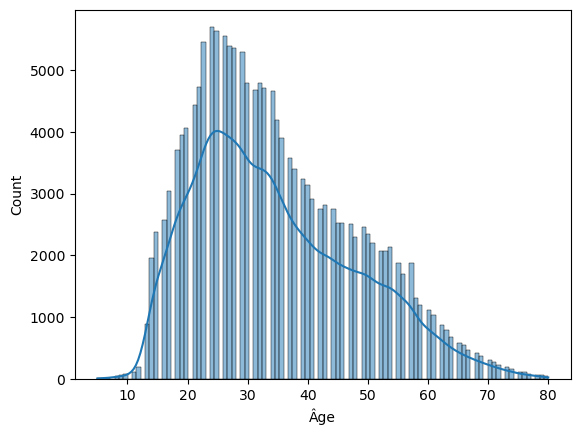

In [62]:
sns.histplot(data=users, x='Age',kde=True)
plt.xlabel('Âge') 
plt.show ()

In [63]:
round(users['Age'].mean())

35

In [64]:
users['Age'].fillna(round(users['Age'].mean()), inplace=True)

In [65]:
users.Age.unique() 

array([35., 18., 17., 61., 26., 14., 25., 19., 46., 55., 32., 24., 20.,
       34., 23., 51., 31., 21., 44., 30., 57., 43., 37., 41., 54., 42.,
       50., 39., 53., 47., 36., 28., 13., 58., 49., 38., 45., 62., 63.,
       27., 33., 29., 66., 40., 15., 60., 79., 22., 16., 65., 59., 48.,
       72., 56., 67., 80., 52., 69., 71., 73., 78.,  9., 64., 12., 74.,
       75., 76., 68., 11., 77., 70.,  8.,  7., 10.,  5.,  6.])

### Rating

In [66]:
rating=Rating.copy()

In [67]:
rating.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [68]:
rating.shape

(1048575, 3)

In [69]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   User-ID      1048575 non-null  int64 
 1   ISBN         1048575 non-null  object
 2   Book-Rating  1048575 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 24.0+ MB


In [70]:
rating.isna().sum()/rating.shape[0]

User-ID        0.0
ISBN           0.0
Book-Rating    0.0
dtype: float64

In [71]:
rating['Book-Rating'].unique()

array([ 0,  5,  3,  6,  8,  7, 10,  9,  4,  1,  2], dtype=int64)

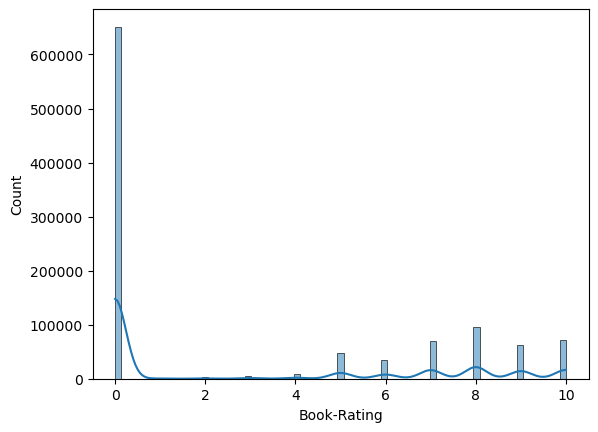

In [72]:
sns.histplot(data=rating , x='Book-Rating', kde=True )
plt.show()

In [73]:
ratings_explicit = rating[rating['Book-Rating'] != 0]
ratings_implicit = rating[rating['Book-Rating'] == 0]

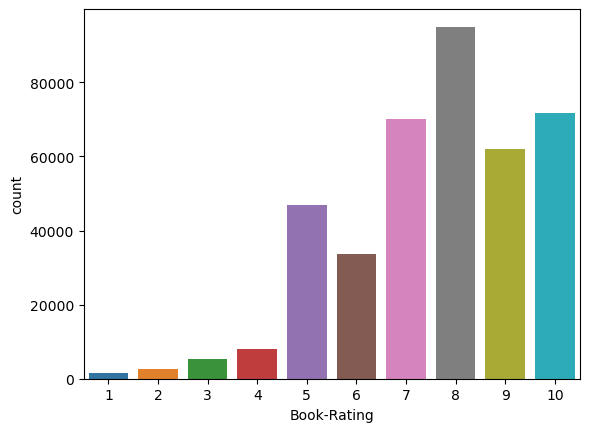

In [74]:
sns.countplot(data=ratings_explicit,x='Book-Rating')
plt.show()

In [75]:
df=pd.merge(books,rating, on='ISBN', how='inner')

In [76]:
df.head() 

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover,User-ID,Book-Rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5
2,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0
3,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8
4,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0


In [77]:
df.shape

(941140, 8)

# ## check populare books 

In [78]:
agg_rating = df.groupby('Book_Title').agg(number_of_rating=('Book-Rating','count'), mean_Rating=('Book-Rating','mean'))
agg_rating

,number_of_rating,mean_Rating
Book_Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",4,2.25
Always Have Popsicles,1,0.00
Apple Magic (The Collector's series),1,0.00
Beyond IBM: Leadership Marketing and Finance for the 1990s,1,0.00
Clifford Visita El Hospital (Clifford El Gran Perro Colorado),1,0.00
...,...,...
Ã?Â?l- Connection.,1,0.00
Ã?Â?lpiraten.,2,0.00
Ã?Â?rger mit Produkt X. Roman.,4,5.25


In [79]:
Most_ratings = agg_rating[agg_rating['number_of_rating']>100] # Keep the books with over 100 ratings
Most_ratings

,number_of_rating,mean_Rating
Book_Title,,
1984,253,4.403162
1st to Die: A Novel,469,3.616205
2nd Chance,323,3.374613
4 Blondes,129,1.968992
84 Charing Cross Road,114,4.307018
...,...,...
Wuthering Heights,180,2.900000
Year of Wonders,156,4.256410
You Belong To Me,118,2.805085


In [80]:
populare_book=Most_ratings.sort_values(by="number_of_rating",ascending=False).head()
populare_book 

,number_of_rating,mean_Rating
Book_Title,,
Wild Animus,2264,1.032244
The Lovely Bones: A Novel,1164,4.457045
The Da Vinci Code,828,4.679952
A Painted House,766,3.199739
The Nanny Diaries: A Novel,759,3.459816


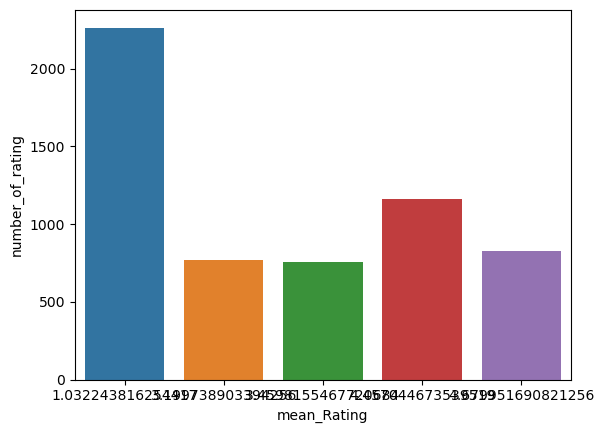

In [81]:
sns.barplot(data=populare_book, y='number_of_rating', x='mean_Rating')  # Tracer le diagramme à barres
plt.show() 

In [82]:
best_Rating=populare_book.sort_values(by='mean_Rating', ascending=False).head()
best_Rating 

,number_of_rating,mean_Rating
Book_Title,,
The Da Vinci Code,828,4.679952
The Lovely Bones: A Novel,1164,4.457045
The Nanny Diaries: A Novel,759,3.459816
A Painted House,766,3.199739
Wild Animus,2264,1.032244


In [83]:
final=pd.merge(df,users,on='User-ID',how='inner')
final.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941140 entries, 0 to 941139
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ISBN               941140 non-null  object 
 1   Book_Title         941140 non-null  object 
 2   Book_Author        941138 non-null  object 
 3   yearofpublication  928310 non-null  float64
 4   publisher          941134 non-null  object 
 5   Book_Cover         941140 non-null  object 
 6   User-ID            941140 non-null  int64  
 7   Book-Rating        941140 non-null  int64  
 8   Location           941140 non-null  object 
 9   Age                941140 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 71.8+ MB


In [84]:
final.shape

(941140, 10)

In [85]:
final1=pd.merge(final,Most_ratings,on='Book_Title',how='inner')
final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 941140 entries, 0 to 941139
Data columns (total 10 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ISBN               941140 non-null  object 
 1   Book_Title         941140 non-null  object 
 2   Book_Author        941138 non-null  object 
 3   yearofpublication  928310 non-null  float64
 4   publisher          941134 non-null  object 
 5   Book_Cover         941140 non-null  object 
 6   User-ID            941140 non-null  int64  
 7   Book-Rating        941140 non-null  int64  
 8   Location           941140 non-null  object 
 9   Age                941140 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 71.8+ MB


In [86]:
final1.shape

(155944, 12)

In [87]:
final1.head(10)

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover,User-ID,Book-Rating,Location,Age,number_of_rating,mean_Rating
0,399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,8,0,"timmins, ontario, canada",35.0,284,3.003521
1,399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,11676,9,"n/a, n/a, n/a",35.0,284,3.003521
2,080410753X,The Kitchen God's Wife,Amy Tan,1992.0,Ivy Books,http://images.amazon.com/images/P/080410753X.0...,11676,8,"n/a, n/a, n/a",35.0,284,3.003521
3,080410753X,The Kitchen God's Wife,Amy Tan,1992.0,Ivy Books,http://images.amazon.com/images/P/080410753X.0...,85526,0,"victoria, british columbia, canada",36.0,284,3.003521
4,080410753X,The Kitchen God's Wife,Amy Tan,1992.0,Ivy Books,http://images.amazon.com/images/P/080410753X.0...,110912,9,"milpitas, california, usa",36.0,284,3.003521
5,080410753X,The Kitchen God's Wife,Amy Tan,1992.0,Ivy Books,http://images.amazon.com/images/P/080410753X.0...,137688,0,"medford, new york, usa",46.0,284,3.003521
6,399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,29526,9,"knoxville, tennessee, usa",26.0,284,3.003521
7,399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,36836,0,"raleigh, north carolina, usa",56.0,284,3.003521
8,080410753X,The Kitchen God's Wife,Amy Tan,1992.0,Ivy Books,http://images.amazon.com/images/P/080410753X.0...,36836,0,"raleigh, north carolina, usa",56.0,284,3.003521
9,399135782,The Kitchen God's Wife,Amy Tan,1991.0,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,46398,9,"san antonio, texas, usa",37.0,284,3.003521


In [88]:
by_age=final1.groupby('Book_Title')['Age'].mean().reset_index()
by_age

,Book_Title,Age
0,1984,30.213439
1,1st to Die: A Novel,37.215352
2,2nd Chance,38.099071
3,4 Blondes,33.372093
4,84 Charing Cross Road,36.824561
...,...,...
789,Wuthering Heights,32.266667
790,Year of Wonders,38.339744
791,You Belong To Me,36.974576
792,Zen and the Art of Motorcycle Maintenance: An ...,34.507853


In [89]:
min=by_age.min()
max=by_age.max()
print(min)
print(max)

Book_Title         1984
Age           30.213439
dtype: object
Book_Title    \O\" Is for Outlaw"
Age                     43.054054
dtype: object


In [90]:
moyenne_age_par_livre = final.groupby('Book_Title')['Age'].mean().reset_index()
moyenne_age_par_livre

,Book_Title,Age
0,A Light in the Storm: The Civil War Diary of ...,30.50
1,Always Have Popsicles,44.00
2,Apple Magic (The Collector's series),62.00
3,Beyond IBM: Leadership Marketing and Finance ...,35.00
4,Clifford Visita El Hospital (Clifford El Gran...,35.00
...,...,...
230232,Ã?Â?l- Connection.,27.00
230233,Ã?Â?lpiraten.,38.00
230234,Ã?Â?rger mit Produkt X. Roman.,43.75
230235,Ã?Â?stlich der Berge.,37.00


In [91]:
age_min = moyenne_age_par_livre ['Age'].min()
print(age_min)
age_max = moyenne_age_par_livre ['Age'].max()
print(age_max)

5.0
80.0


In [92]:
def classifier_age(moyenne_age):
    if moyenne_age <= 12:
        return 'Enfant'
    elif 12 <moyenne_age <= 20:
        return 'Adolescent'
    else:
        return 'Majeur'

In [93]:
final['Catégorie Âge'] = final['Age'].apply(classifier_age)
final.head(5)

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover,User-ID,Book-Rating,Location,Age,Catégorie Âge
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,Adolescent
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",35.0,Majeur
2,60973129,Decision in Normandy,Carlo D'Este,1991.0,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,8,0,"timmins, ontario, canada",35.0,Majeur
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999.0,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,8,0,"timmins, ontario, canada",35.0,Majeur
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999.0,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,8,0,"timmins, ontario, canada",35.0,Majeur


In [94]:
moy = final.groupby('Book_Title')['Book-Rating'].mean().reset_index()
moy['Book-Rating'] = moy['Book-Rating'].round().astype(int)
moy = moy.rename(columns={'Book-Rating': 'mean_of_rating'})
moy

,Book_Title,mean_of_rating
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,0
2,Apple Magic (The Collector's series),0
3,Beyond IBM: Leadership Marketing and Finance ...,0
4,Clifford Visita El Hospital (Clifford El Gran...,0
...,...,...
230232,Ã?Â?l- Connection.,0
230233,Ã?Â?lpiraten.,0
230234,Ã?Â?rger mit Produkt X. Roman.,5
230235,Ã?Â?stlich der Berge.,4


In [95]:
final_avec_moy=pd.merge(final,moy,on='Book_Title',how='inner')
final_avec_moy.head(5)

,ISBN,Book_Title,Book_Author,yearofpublication,publisher,Book_Cover,User-ID,Book-Rating,Location,Age,Catégorie Âge,mean_of_rating
0,195153448,Classical Mythology,Mark P. O. Morford,2002.0,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,2,0,"stockton, california, usa",18.0,Adolescent,0
1,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,8,5,"timmins, ontario, canada",35.0,Majeur,5
2,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11400,0,"ottawa, ontario, canada",49.0,Majeur,5
3,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,11676,8,"n/a, n/a, n/a",35.0,Majeur,5
4,2005018,Clara Callan,Richard Bruce Wright,2001.0,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,41385,0,"sudbury, ontario, canada",35.0,Majeur,5


In [96]:
enfants = final_avec_moy[final['Catégorie Âge'] == 'Enfant'][['Book_Title', 'mean_of_rating','Book_Cover']]
enfants.head(2)

,Book_Title,mean_of_rating,Book_Cover
314702,Under the Banner of Heaven : A Story of Violen...,4,http://images.amazon.com/images/P/0385509510.0...
428335,The Diary of an American Au Pair: A Novel,2,http://images.amazon.com/images/P/1400032644.0...


In [97]:
top_enfants = enfants.sort_values(by='mean_of_rating', ascending=False) 
top_enfants.head(2) 

,Book_Title,mean_of_rating,Book_Cover
915236,LA Excursion a Tindari (Narrativa),10,http://images.amazon.com/images/P/8478886680.0...
841987,The Aeneid,10,http://images.amazon.com/images/P/0394528271.0...


In [98]:
Adolescent = final_avec_moy[final['Catégorie Âge'] == 'Adolescent'][['Book_Title', 'mean_of_rating','Book_Cover']]

Adolescent.head(2)

,Book_Title,mean_of_rating,Book_Cover
0,Classical Mythology,0,http://images.amazon.com/images/P/0195153448.0...
20621,The God of Small Things,3,http://images.amazon.com/images/P/0060977493.0...


In [99]:
top_adolesscent = Adolescent.sort_values(by='mean_of_rating', ascending=False).head()
top_adolesscent.head(2)

,Book_Title,mean_of_rating,Book_Cover
767020,Twenty Love Poems and a Song of Despair,10,http://images.amazon.com/images/P/0811803201.0...
672288,Sega Genesis Games Secrets Greatest Tips (Secr...,10,http://images.amazon.com/images/P/1559584017.0...


In [100]:
Majeur= final_avec_moy[final['Catégorie Âge'] == 'Majeur'][['Book_Title', 'mean_of_rating','Book_Cover']]
Majeur.head(2)

,Book_Title,mean_of_rating,Book_Cover
1,Clara Callan,5,http://images.amazon.com/images/P/0002005018.0...
2,Clara Callan,5,http://images.amazon.com/images/P/0002005018.0...


In [101]:
top_majeur =Majeur.sort_values(by='mean_of_rating', ascending=False).head(10)
top_majeur.head(2)

,Book_Title,mean_of_rating,Book_Cover
865708,Paws to Consider : Choosing the Right Dog for ...,10,http://images.amazon.com/images/P/0446521515.0...
715277,Campbell's Back Label Recipes: And More!,10,http://images.amazon.com/images/P/069620505X.0...


In [2]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

def detect_age():
    # Charger le classificateur de visages pré-entraîné
    face_classifier = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

    # Charger le modèle d'âge pré-entraîné
    age_model = load_model('age_model_50epochs.keras')

    # Ouvrir la webcam (0 pour la webcam intégrée)
    cap = cv2.VideoCapture(0)

    # Vérifier si la caméra est ouverte
    if not cap.isOpened():
        print("Erreur: Impossible d'ouvrir la caméra.")
        return

    # Variable pour stocker la catégorie d'âge détectée
    detected_category = None

    # Variable pour limiter la fréquence d'affichage
    display_interval = 5  # Affichage tous les 5 frames

    frame_count = 0  # Compteur de frames
    while True:
        # Capturer une frame de la webcam
        ret, frame = cap.read()

        # Vérifier si la capture de l'image est réussie
        if not ret:
            print("Erreur: Impossible de capturer l'image.")
            break

        # Convertir l'image en niveaux de gris pour la détection de visages
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        # Détecter les visages dans l'image en niveaux de gris
        faces = face_classifier.detectMultiScale(gray, 1.3, 5)

        if len(faces) > 0:
            # Dessiner un cadre autour du visage détecté
            for (x, y, w, h) in faces:
                cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)

                # Extraire la région d'intérêt (ROI) du visage en couleur
                roi_color = frame[y:y + h, x:x + w]

                # Redimensionner la ROI à la taille attendue par le modèle d'âge
                roi_color = cv2.resize(roi_color, (200, 200))

                # Préparation de l'image pour la prédiction (mise à l'échelle et expansion des dimensions)
                roi = roi_color.astype('float') / 255.0  # Mise à l'échelle entre 0 et 1
                roi = np.expand_dims(roi, axis=0)  # Expansion pour la prédiction (1, 200, 200, 3)

                # Prédiction d'âge avec le modèle d'âge
                age_predict = age_model.predict(roi)
                age_low = int(age_predict[0][0]) - 5  # Limite inférieure de l'intervalle d'âge
                age_high = int(age_predict[0][0]) + 5  # Limite supérieure de l'intervalle d'âge

                # Déterminer le groupe d'âge en fonction de l'intervalle prédit
                moyenne_age = (age_low + age_high) / 2
                if moyenne_age <= 12:
                    detected_category = "Enfant"
                elif 12 < moyenne_age <= 20:
                    detected_category = "Adolescent"
                else:
                    detected_category = "Majeur"

                # Afficher l'intervalle d'âge prédit au-dessus du cadre du visage
                age_label = f"Age: {age_low}-{age_high} ans ({detected_category})"
                cv2.putText(frame, age_label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 0, 0), 2)

                # Afficher la catégorie d'âge prédite dans la console
                print("Catégorie d'âge prédite:", detected_category)

        # Afficher l'image avec les cadres et les informations d'âge
        if frame_count % display_interval == 0:  # Afficher tous les 5 frames
            cv2.imshow('Age Detector', frame)

        # Vérifier si l'utilisateur a appuyé sur la touche 'q'
        if cv2.waitKey(1) == ord('q'):
            break

        frame_count += 1

    # Libérer la webcam et fermer toutes les fenêtres
    cap.release()
    cv2.destroyAllWindows()

    # Retourner la catégorie d'âge détectée à la fin
    return detected_category


In [3]:
detected_category = detect_age()q
detected_category


C:\Users\CBE\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 6 variables whereas the saved optimizer has 10 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Catégorie d'âge prédite: Majeur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Catégorie d'âge prédite: Majeur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step
Catégorie d'âge prédite: Majeur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Catégorie d'âge prédite: Majeur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Catégorie d'âge prédite: Majeur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
Catégorie d'âge prédite: Majeur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 262ms/step
Catégorie d'âge prédite: Majeur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Catégorie d'âge prédite: Adolescent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step
Catégorie d'âge prédite: Adolescent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step
Catégorie d'âge prédite: Majeur
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
Catégorie d'âge prédite: Adolescent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step
Catégorie d'âge prédite: Adolescent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 245ms/step
Catégorie d'âge prédite: Adolescent
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step
Catégorie d'âge prédi

'Majeur'

In [105]:
age=detected_category
age


'Majeur'

In [106]:
# Check if the detected_category matches any of the conditions
if age == "Majeur":
    try:
        recommended_books = top_majeur['Book_Title'][:10]  # Get the top 10 books for adults
        print(f"Recommandation de livres pour la catégorie '{detected_category}':")
        for book in recommended_books:
            print(book)
    except (KeyError, AttributeError):
        print("Erreur: Les données pour la catégorie 'Majeur' ne sont pas disponibles.")
elif detected_category == "Adolescent":
    try:
        recommended_books = top_adolescent['Book_Title'][:10]  # Get the top 10 books for adolescents
        print(f"Recommandation de livres pour la catégorie '{detected_category}':")
        for book in recommended_books:
            print(book)
    except (KeyError, AttributeError):
        print("Erreur: Les données pour la catégorie 'Adolescent' ne sont pas disponibles.")
else:
    try:
        recommended_books = top_enfants['Book_Title'][:10]  # Get the top 10 books for children
        print(f"Recommandation de livres pour la catégorie '{detected_category}':")
        for book in recommended_books:
            print(book)
    except (KeyError, AttributeError):
        print("Erreur: Les données pour la catégorie 'Enfants' ne sont pas disponibles.")


Recommandation de livres pour la catégorie 'Majeur':
Paws to Consider : Choosing the Right Dog for You and Your Family
Campbell's Back Label Recipes: And More!
Kermit Learns How Computers Work (A Muppet Computer Book)
The L-shaped Room
Beatrix Potter: Artist, Stroyteller and Countrywoman
Beatrix Potter: The Complete Tales : The 23 Original Peter Rabbit Books &amp; 4 Unpublished Works
Beatrix Potter: The Complete Tales : The 23 Original Peter Rabbit Books &amp; 4 Unpublished Works
From The Dust Returned
The L-shaped Room
The Frasier Scripts


### Create User-Book Matrix 

In [103]:
matrix = final1.pivot_table(index='User-ID', columns='ISBN' , values='Book-Rating')


### Data Normalization

In [104]:
matrix_norm = matrix.subtract(matrix.mean(axis=1), axis = 'rows')
matrix_norm.head(10)

ISBN,002542730X,002542730x,006001203X,006016848X,006016848x,006017322X,006099486X,006099486x,006101351X,006101351x,...,B00009EF82,B00009NDAN,B0000AA9JB,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEH8,B0001FZGBC,B0001FZGPI
User-ID,,,,,,,,,,,,,,,,,,,,,
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [105]:
matrix_norm.fillna(value=0,inplace=True)
matrix_norm 

ISBN,002542730X,002542730x,006001203X,006016848X,006016848x,006017322X,006099486X,006099486x,006101351X,006101351x,...,B00009EF82,B00009NDAN,B0000AA9JB,B0000C7BNG,B0000E63CJ,B0000T6KHI,B0000T6KIM,B0000VZEH8,B0001FZGBC,B0001FZGPI
User-ID,,,,,,,,,,,,,,,,,,,,,
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
278836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278843,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
278844,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
import pickle

objet_a_enregistrer = matrix_norm
chemin_fichier = "matrix_norm.pkl"
with open(chemin_fichier, "wb") as f:
    pickle.dump(objet_a_enregistrer, f)  
    


In [106]:
# Supprimer les valeurs manquantes dans le tableau pivot
matrix_cleaned = matrix.dropna(axis=1) 

# Vérifier les livres répétés dans les colonnes (ISBN)
duplicates_columns = matrix_cleaned.columns[matrix_cleaned.columns.duplicated()]

if len(duplicates_columns) > 0:
    print("Il y a des livres répétés dans les colonnes (ISBN) du tableau pivot.")
    print("Livres répétés : ", duplicates_columns)
else:
    print("Il n'y a pas de livres répétés dans les colonnes (ISBN) du tableau pivot.")


Il n'y a pas de livres répétés dans les colonnes (ISBN) du tableau pivot.


In [107]:
non_zero_ratings_count= matrix_norm.astype(bool).sum()
non_zero_ratings_count

ISBN
002542730X    129
002542730x      3
006001203X     42
006016848X    116
006016848x      0
             ... 
B0000T6KHI      2
B0000T6KIM      1
B0000VZEH8      2
B0001FZGBC      0
B0001FZGPI      1
Length: 2639, dtype: int64

# Training our recommendation system

### User-based Recommendation System

In [108]:
def findksimilarusers(user_id, ratings, metric = 'cosine', k=10):
    similarities=[] #stocker les similarités calculés
    indices=[]#stoacker les indices de users sim
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute') 
    #crée un modèle kNN en spécifiant la métrique de distance à utiliser pour calculer la proximité
    #entre les points de données et en choisissant l'algorithme "brute" pour rechercher les plus proches voisins
    model_knn.fit(ratings) 
    loc = ratings.index.get_loc(user_id) #l'emplacement de user specfié 
    # Utilise le modèle kNN pour trouver les k+1 voisins les plus proches du point utilisateur spécifié
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    # Calcule les similarités à partir des distances obtenues (la similarité est l'inverse de la distance)
    similarities = 1-distances.flatten()   
    #nous transformons cette matrice de distances en un tableau à une seule dimension pour faciliter les calculs (flatten).
    return similarities,indices  

In [109]:
findksimilarusers(278854, matrix_norm, metric='cosine', k=10)

C:\Users\CBE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


(array([1.        , 0.75592895, 0.57735027, 0.57735027, 0.57735027,
        0.48753809, 0.47140452, 0.39013716, 0.37463432, 0.35761756,
        0.35355339]),
 array([[33383,  9535, 21163, 12010,  2425, 12650, 32000, 24437, 25774,
          4476,  8877]], dtype=int64))

In [110]:
def predict_userbased(user_id, item_id, ratings, metric = 'cosine', k=10):
    prediction=0 
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    #Obtient les emplacements (index) de l'utilisateur et de l'élément dans le DataFrame ratings.
    similarities, indices=findksimilarusers(user_id, ratings,metric, k) 
    #Appelle de fonction findksimilarusers pour trouver les utilisateurs les plus similaires
    mean_rating = ratings.iloc[user_loc,:].mean()
    #Calcule la moyenne des notations données par l'utilisateur donné.
    sum_wt = np.sum(similarities)-1 # la somme de toutes les similarités entre l'utilisateur similaire et l'utilisateur donné.
    product=1 
    wtd_sum = 0 # la somme pondérée des différences de notation entre l'utilisateur similaire et l'utilisateur donné
    
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == user_loc:
            continue;
        else: 
            ratings_diff = ratings.iloc[indices.flatten()[i],item_loc]-np.mean(ratings.iloc[indices.flatten()[i],:])
            product = ratings_diff * (similarities[i])
            wtd_sum = wtd_sum + product
            #Parcourt les utilisateurs similaires et calcule la somme pondérée des différences de notation entre l'élément donné et les éléments notés par ces utilisateurs similaires.
    if prediction <= 0:
        prediction = 1   
    elif prediction >10:
        prediction = 10
    
    #prediction = int(round(mean_rating + (wtd_sum/sum_wt)))
    #la prédiction finale en ajoutant la moyenne des notations de l'utilisateur donné à la somme pondérée des différences de notation.
    return prediction 

In [111]:
prediction=predict_userbased(278854,'B0001FZGPI',matrix_norm , metric = 'cosine', k=10)
prediction 

C:\Users\CBE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


1

In [112]:
def recommend_userbased(user_id, ratings, metric='cosine'):
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
        # vérifie d'abord si l'ID de l'utilisateur fourni est valide et si l'utilisateur existe dans l'ensemble de données des évaluations.
    else:    
        prediction = [] #pour stocker les prédictions de notation pour chaque article
        for i in range(ratings.shape[1]):
            if (ratings[str(ratings.columns[i])][user_id] !=0): 
                prediction.append(predict_userbased(user_id, str(ratings.columns[i]) ,ratings, metric))
            else:                    
                prediction.append(-1) 
        prediction = pd.Series(prediction)
        prediction = prediction.sort_values(ascending=False)#Nous trions ensuite les prédictions par ordre décroissant.
        recommended = prediction[:10]#Nous sélectionnons les 10 premières prédictions comme recommandations pour l'utilisateur.
        print("The Results using user based collaborative filtering are :")
    for i in range (len(recommended)):
        print("{0}. {1}".format(i + 1, books.loc[recommended.index[i], 'Book_Title'].encode('utf-8')))
        


In [113]:
recommend_userbased(278854,matrix_norm ,metric='cosine') 

C:\Users\CBE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\CBE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(
C:\Users\CBE\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


The Results using user based collaborative filtering are :
1. b'Nessie: The Loch Ness Monster'
2. b'The Five People You Meet in Heaven'
3. b"Cantor's Dilemma"
4. b'Climbing Mt. Shasta: Route 1, Avalanche Gulch'
5. b'Never Act Your Age: Play the Happy Childlike Role Well at Every Age'
6. b'Lord of the Flies'
7. b'The Biograph Girl'
8. b'Sofies Welt'
9. b'Dead Ringer'
10. b'Cerulean Sins: An Anita Blake, Vampire Hunter Novel'


### item-based Recommendation Systems

In [114]:
 def findksimilaritems(item_id, ratings, metric='cosine', k=10):
    similarities=[]
    indices=[]
    ratings=ratings.T
    loc = ratings.index.get_loc(item_id)
    model_knn = NearestNeighbors(metric = metric, algorithm = 'brute')
    model_knn.fit(ratings)
    
    distances, indices = model_knn.kneighbors(ratings.iloc[loc, :].values.reshape(1, -1), n_neighbors = k+1)
    similarities = 1-distances.flatten()

    return similarities,indices 


In [115]:
findksimilaritems('002542730x' , matrix_norm, metric='cosine', k=20)

(array([1.        , 0.2569411 , 0.1739227 , 0.16552997, 0.15365659,
        0.15283279, 0.13153243, 0.13051325, 0.12184021, 0.12055662,
        0.11692619, 0.11616871, 0.11503151, 0.11355625, 0.10688459,
        0.1048378 , 0.10315504, 0.10118544, 0.09868345, 0.09756967,
        0.0946952 ]),
 array([[   1,  301, 2027, 1598,  196, 1158,   92, 2149, 1709,  711,  715,
          601,  683,  710,  602,  829,  247,  709, 2068, 1443, 1022]],
       dtype=int64))

In [116]:
def predict_itembased(user_id, item_id, ratings, metric = 'cosine', k=20):
    prediction= wtd_sum =0
    user_loc = ratings.index.get_loc(user_id)
    item_loc = ratings.columns.get_loc(item_id)
    similarities, indices=findksimilaritems(item_id, ratings)
    sum_wt = np.sum(similarities)-1
    product=1
    for i in range(0, len(indices.flatten())):
        if indices.flatten()[i] == item_loc:
            continue;
        else:
            product = ratings.iloc[user_loc,indices.flatten()[i]] * (similarities[i])
            wtd_sum = wtd_sum + product                              
    prediction = round(wtd_sum/sum_wt)    
    if prediction <= 0:
        prediction = 1   
    elif prediction >10 :
        prediction = 10
    return prediction 


In [117]:
predict_itembased(278854,'006099486x',matrix_norm)   

1

In [118]:
def recommend_itembased(user_id, ratings, metric='cosine'):
    if (user_id not in ratings.index.values) or type(user_id) is not int:
        print("User id should be a valid integer from this list :\n\n {} ".format(re.sub('[\[\]]', '', np.array_str(ratings_matrix.index.values))))
    else: 
        prediction = [] #pour stocker les prédictions de notation pour chaque article
        for i in range(ratings.shape[1]):
            if (ratings[str(ratings.columns[i])][user_id] !=0): 
                 prediction.append(predict_itembased(user_id, str(ratings.columns[i]) ,ratings, metric))

            else:                    
                prediction.append(-1) 
                #Pour chaque article, nous vérifions si l'utilisateur a déjà donné une note à cet article. Si oui, nous appelons une fonction predict_itembased pour prédire la notation de l'utilisateur pour cet article en utilisant le filtrage collaboratif basé sur les articles. Sinon, nous ajoutons -1 à la liste de prédictions, ce qui signifie que l'article n'est pas recommandé car l'utilisateur n'a pas encore donné de note à cet article.
        prediction = pd.Series(prediction) # toutes les prédictions ont été collectées,
        prediction = prediction.sort_values(ascending=False) # Nous trions ensuite les prédictions par ordre décroissant.
        recommended = prediction[:10] #Nous sélectionnons les 10 premières prédictions comme recommandations pour l'utilisateur.
        print("The Results using item based collaborative filtering are :")
        for i in range (len(recommended)):
            print("{0}. {1}".format(i + 1, books.loc[recommended.index[i], 'Book_Title'].encode('utf-8')))
        


In [119]:
recommend_itembased(56399,matrix_norm,metric='cosine') 

The Results using item based collaborative filtering are :
1. b'Wicked: The Life and Times of the Wicked Witch of the West'
2. b'How to Be Good'
3. b"Les fantomes, ca n' existe pas. (Lernmaterialien)"
4. b'Lily White'
5. b"The Dress Lodger (Ballantine Reader's Circle)"
6. b'Chicken Soup for the Soul (Chicken Soup for the Soul)'
7. b'Of Love and Shadows'
8. b'The House of the Spirits'
9. b'Tis : A Memoir'
10. b'Black Rainbow'


In [120]:
X=recommend_itembased(278854,matrix_norm,metric='cosine')  

The Results using item based collaborative filtering are :
1. b'Nessie: The Loch Ness Monster'
2. b'The Five People You Meet in Heaven'
3. b"Cantor's Dilemma"
4. b'Climbing Mt. Shasta: Route 1, Avalanche Gulch'
5. b'Never Act Your Age: Play the Happy Childlike Role Well at Every Age'
6. b'Lord of the Flies'
7. b'The Biograph Girl'
8. b'Sofies Welt'
9. b'Dead Ringer'
10. b'Cerulean Sins: An Anita Blake, Vampire Hunter Novel'


In [122]:
#model = RecommendationModel(userBased=True)  # Pour un filtrage collaboratif basé sur les utilisateurs
# Ou
model = RecommendationModel(userBased=False)  # Pour un filtrage collaboratif basé sur les éléments


In [123]:
from sklearn.metrics import mean_squared_error


In [124]:
ratings_actual = final [['User-ID', 'ISBN', 'Book-Rating']]

import re

class Evaluation:
    def __init__(self, model):
        self.model = model

    def evaluate(self, user_id, ratings, metric='cosine', k=10):
        # Make recommendations using the model
        recommendations = self.RecommendationModel(user_id, ratings, metric=metric, wt=1) 

        # Extract the recommended items and their predicted ratings
        recommended_items = recommendations.index
        predicted_ratings = recommendations['RecommendationScore']

        # Extract the actual ratings for the recommended items
        actual_ratings = ratings.loc[user_id, recommended_items]

        # Calculate the Mean Squared Error (MSE) for the recommendations
        mse = np.mean((actual_ratings - predicted_ratings) ** 2)

        return mse


In [125]:
# Initialize the Evaluation class with your RecommendationModel instance
evaluation = Evaluation(model)

# Example of evaluating the model for a specific user
user_id_to_evaluate = "002542730x" # Replace this with the user ID you want to evaluate 
mse_score = evaluation.evaluate(user_id_to_evaluate,ratings_actual) 
print("Mean Squared Error:", mse_score)                                                       

AttributeError: 'Evaluation' object has no attribute 'RecommendationModel'